In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from feature_format import featureFormat

## Data inlezen

In [2]:
data = pd.read_csv('recipes_v3.csv', sep=';')

len(data)

2023

In [3]:
 # Drop the duplicate recipes in the data
data.drop_duplicates(subset='recipe_url')


len(data)

    # As you can see, the data has no duplicates

2023

## Data Pre-processen

In [4]:
    # Delete all rows with value NaN in columns
#data = data.fillna(0);
data = data.dropna()
len(data)

1473

In [5]:
    # 'Delete' all nutritional values / Make new DF without nutritional values
del_nutritional_values = True
headers = list(data)


if del_nutritional_values == True:
        new_headers = headers[0:4] + headers[12:14]
        new_data = pd.DataFrame(data[new_headers])        

### Stopworden wegfilteren


In [6]:
stop_words = list(stopwords.words('english'))

LookupError: 
**********************************************************************
  Resource 'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\HPuser/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\HPuser\\Anaconda3\\nltk_data'
    - 'C:\\Users\\HPuser\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HPuser\\AppData\\Roaming\\nltk_data'
**********************************************************************

In [207]:
def filter_stop_words(col_name, data):
    data_filtered = []
    for sentence in data[col_name]:
        col = []
        for w in sentence.split():
            if not w in stop_words:
                col.append(w)
        data_filtered.append(col)
    return data_filtered

In [208]:
data_filtered_title = filter_stop_words('title', data)
data_filtered_descr = filter_stop_words('description', data)
data_filtered_ingr = filter_stop_words('ingredients', data)
data_filtered_meth = filter_stop_words('method',data)

In [7]:
def conc_words(data):
    list = []
    for sentence in data:
        list.append(' '.join(word for word in sentence))
    return list

In [8]:
title = conc_words(data_filtered_title)
descr = conc_words(data_filtered_descr)
ingr = conc_words(data_filtered_ingr)
meth = conc_words(data_filtered_meth)

NameError: name 'data_filtered_title' is not defined

In [211]:
df = pd.DataFrame({'title':title, 'description':descr, 'ingredients':ingr, 'method':meth})

### Bag of Words

In [212]:
def create_bagofwords(data):
    cnt_vect = CountVectorizer()
    bow = cnt_vect.fit_transform(data)
    tfidf_transformer = TfidfTransformer()
    bow_tfidf = tfidf_transformer.fit_transform(bow)
    
    return bow_tfidf

In [213]:
tfidf_title = create_bagofwords(df['title'])
tfidf_descr = create_bagofwords(df['description'])
tfidf_ingr = create_bagofwords(df['ingredients'])
tfidf_meth = create_bagofwords(df['method'])

### Categorical string to int

In [214]:
s = pd.Series(data['skill_level'].unique())
f_enc = pd.factorize(data['skill_level'])

## Clusteren

In [240]:
cluster_data = pd.DataFrame({'title':tfidf_title, 'description':tfidf_descr, 'ingredients':tfidf_ingr, 'method':tfidf_meth, 'skill_level':f_enc[0]})
cluster_data_array = cluster_data.values

In [312]:
# Waarom komt hier per column steeds hetzelfde resultaat uit?
    #cluster_data['description']

In [316]:
f1 = cluster_data['title'][0]
f2 = cluster_data['description'][0]
f3 = cluster_data['ingredients'][0]
f4 = cluster_data['method'][0]
f5 = cluster_data['skill_level']

In [320]:
kmeans = KMeans(n_clusters=3).fit(f1, f2)

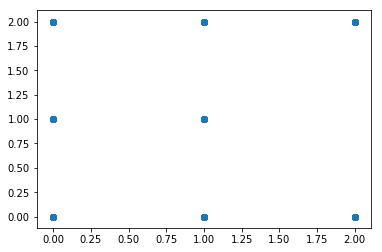

In [327]:
plt.scatter(cluster_data['skill_level'].values.reshape(-1,1), kmeans.labels_)

In [308]:
cluster_data['skill_level'].values.reshape(-1,1)


array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)